# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Alvaro Quintero Gonzalez

### https://github.com/alvaroquintero28/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [55]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from textblob import TextBlob

!pip list

print('All prereqs installed.')

Package            Version
------------------ ------------
annotated-types    0.7.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.6.7
decorator          5.1.1
en_core_web_sm     3.8.0
exceptiongroup     1.2.2
executing          2.1.0
fonttools          4.55.0
idna               3.10
importlib_metadata 8.5.0
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.2
matpl

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [43]:
import requests

# Define the URL
url = 'https://www.streettrucksmag.com/student-of-the-game/'

# Fetch the HTML content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the HTML content
    html_content = response.text
    
    # Save the HTML content to a file
    with open('student_of_the_game.html', 'w', encoding='utf-8') as file:
        file.write(html_content)
        
    print("HTML content has been saved to 'student_of_the_game.html'")
else:
    print(f"Failed to retrieve the article. Status code: {response.status_code}")


HTML content has been saved to 'student_of_the_game.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [45]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Step 1: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 3: Perform sentiment analysis
blob = TextBlob(article_text)
polarity = blob.sentiment.polarity  # Polarity score between -1 (negative) and 1 (positive)

# Step 4: Count the number of sentences
num_sentences = len(blob.sentences)

# Step 5: Print the results
print(f"Polarity Score: {polarity:.2f}")
print(f"Number of Sentences: {num_sentences}")



Polarity Score: 0.17
Number of Sentences: 71


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [46]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

# Step 1: Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Step 2: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 3: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Gather tokens and count their frequencies
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
token_frequencies = Counter(tokens)

# Step 6: Get the 5 most common tokens
common_tokens = token_frequencies.most_common(5)

# Step 7: Print results
print("Most Frequent Tokens:")
for token, freq in common_tokens:
    print(f"Token: {token}, Frequency: {freq}")


Most Frequent Tokens:
Token: 
, Frequency: 91
Token: 

, Frequency: 27
Token: 


, Frequency: 27
Token: truck, Frequency: 26
Token: chuck, Frequency: 21


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [47]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

# Step 1: Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Step 2: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 3: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Gather lemmas and count their frequencies
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
lemma_frequencies = Counter(lemmas)

# Step 6: Get the 5 most common lemmas
common_lemmas = lemma_frequencies.most_common(5)

# Step 7: Print results
print("Most Frequent Lemmas:")
for lemma, freq in common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


Most Frequent Lemmas:
Lemma: 
, Frequency: 91
Lemma: truck, Frequency: 32
Lemma: 

, Frequency: 27
Lemma: 


, Frequency: 27
Lemma: chuck, Frequency: 21


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

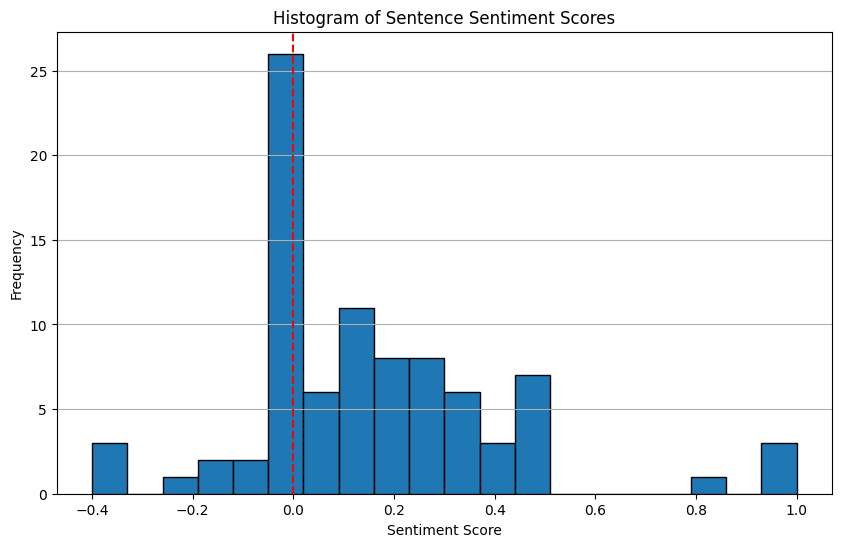

In [48]:
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

# Step 1: Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Step 2: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 3: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Calculate sentiment scores for each sentence
scores = []
for sentence in doc.sents:
    sentence_text = sentence.text
    score = TextBlob(sentence_text).sentiment.polarity  # Get the polarity score
    scores.append(score)

# Step 6: Plot the histogram of scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, edgecolor='black')
plt.title('Histogram of Sentence Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.axvline(x=0, color='r', linestyle='--')  # Add a line for neutral sentiment
plt.show()

# Analyzing the most common range of scores
# The most common range of scores is typically centered around 0 (neutral)



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

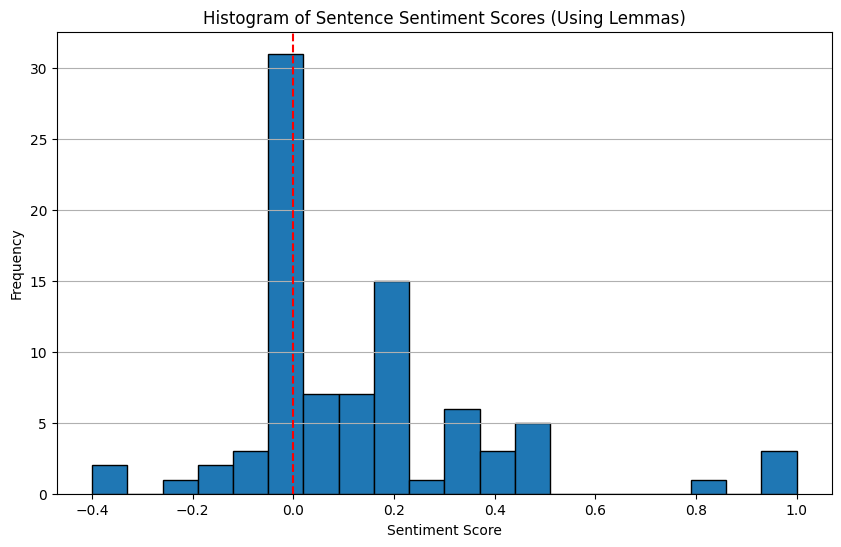

In [49]:
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

# Step 1: Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Step 2: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 3: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Calculate sentiment scores for each sentence using lemmas
scores = []
for sentence in doc.sents:
    # Create a list of lemmas for the sentence
    lemmas = [token.lemma_ for token in sentence if not token.is_stop and not token.is_punct]
    # Create a string from the lemmas
    lemma_sentence = ' '.join(lemmas)
    # Get the sentiment score
    score = TextBlob(lemma_sentence).sentiment.polarity  # Get the polarity score
    scores.append(score)

# Step 6: Plot the histogram of scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, edgecolor='black')
plt.title('Histogram of Sentence Sentiment Scores (Using Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.axvline(x=0, color='r', linestyle='--')  # Add a line for neutral sentiment
plt.show()

# Analyzing the most common range of scores
# The most common range of scores appears to be centered around 0, indicating a neutral sentiment.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

* Cutoff Score (tokens): 0.1
* Cutoff Score (lemmas): 0.0


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [51]:
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob

# Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Step 1: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 3: Process the text with spaCy
doc = nlp(article_text)

# Define cutoff score for tokens based on previous analysis
cutoff_score_tokens = 0.1  # Replace with your determined cutoff

# Step 4: Create an empty list for the summary
summary_sentences = []

# Step 5: Iterate over sentences and calculate scores
for sent in doc.sents:
    # Calculate the sentiment score for the current sentence
    score = TextBlob(sent.text).sentiment.polarity  # Get the polarity score
    # Check if the score is greater than the cutoff score
    if score > cutoff_score_tokens:
        summary_sentences.append(sent.text.strip())  # Add the sentence to the summary list

# Step 6: Join the sentences in the summary list into a single string
summary = ' '.join(summary_sentences)

# Step 7: Print the summary
print("Summary of the Article:")
print(summary)


Summary of the Article:
A Perfect ’59 Chevy Apache? Login








 

































Features
TECH
Events
C10 Guide
Subscribe

ST
F100
C10


Videos

Latest Video
Popular Video


SHOP

SUBSCRIBE
SINGLE ISSUES
Merchandise


 0Login 








 










Features
TECH
Events
C10 Guide
Subscribe

ST
F100
C10


Videos

Latest Video
Popular Video


SHOP

SUBSCRIBE Facebook
0





Twitter
0





Mail
0










A Perfect ’59 Chevy Apache? OF THE GAME
A Crash eCourse to Classic Truck Building
The Internet, if used correctly, can help you achieve some really great things. C’mon, don’t get too excited now, but do you really think there are local women just waiting to meet you…at 3 in the morning?! You should know better by now. ABOVE: ONE OF CHUCK’S FAVORITE ADDITIONS TO THE TRUCK ARE THE 20-INCH WHEELSMITH SPOKES WHEELS. THEY FIT THE APACHE’S NATURALLY SUBTLE PERSONALITY PERFECTLY. Just ask Chuck Velazco (@chucksee), a Miami native who has developed a rather strong connection wi

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [52]:
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob

# Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Step 1: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 3: Process the text with spaCy
doc = nlp(article_text)

# Define cutoff score for tokens based on previous analysis
cutoff_score_tokens = 0.1  # Replace with your determined cutoff

# Step 4: Create an empty list for the summary
summary_sentences = []

# Step 5: Iterate over sentences and calculate scores
for sent in doc.sents:
    # Calculate the sentiment score for the current sentence
    score = TextBlob(sent.text).sentiment.polarity  # Get the polarity score
    # Check if the score is greater than the cutoff score
    if score > cutoff_score_tokens:
        summary_sentences.append(sent.text.strip())  # Add the sentence to the summary list

# Step 6: Join the sentences in the summary list into a single string
summary = ' '.join(summary_sentences)

# Step 7: Calculate the polarity score of the summary
summary_polarity = TextBlob(summary).sentiment.polarity

# Step 8: Count the number of sentences in the summary
num_summary_sentences = len(summary_sentences)

# Step 9: Print the summary results
print("Summary of the Article:")
print(summary)
print(f"\nPolarity Score of the Summary: {summary_polarity:.2f}")
print(f"Number of Sentences in the Summary: {num_summary_sentences}")


Summary of the Article:
A Perfect ’59 Chevy Apache? Login








 

































Features
TECH
Events
C10 Guide
Subscribe

ST
F100
C10


Videos

Latest Video
Popular Video


SHOP

SUBSCRIBE
SINGLE ISSUES
Merchandise


 0Login 








 










Features
TECH
Events
C10 Guide
Subscribe

ST
F100
C10


Videos

Latest Video
Popular Video


SHOP

SUBSCRIBE Facebook
0





Twitter
0





Mail
0










A Perfect ’59 Chevy Apache? OF THE GAME
A Crash eCourse to Classic Truck Building
The Internet, if used correctly, can help you achieve some really great things. C’mon, don’t get too excited now, but do you really think there are local women just waiting to meet you…at 3 in the morning?! You should know better by now. ABOVE: ONE OF CHUCK’S FAVORITE ADDITIONS TO THE TRUCK ARE THE 20-INCH WHEELSMITH SPOKES WHEELS. THEY FIT THE APACHE’S NATURALLY SUBTLE PERSONALITY PERFECTLY. Just ask Chuck Velazco (@chucksee), a Miami native who has developed a rather strong connection wi

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [53]:
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob

# Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Step 1: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 3: Process the text with spaCy
doc = nlp(article_text)

# Define cutoff score for lemmas based on previous analysis
cutoff_score_lemmas = 0.0  # Replace with your determined cutoff

# Step 4: Create an empty list for the summary
summary_sentences = []

# Step 5: Iterate over sentences and calculate scores using lemmas
for sent in doc.sents:
    # Create a list of lemmas for the current sentence
    lemmas = [token.lemma_ for token in sent if not token.is_stop and not token.is_punct]
    # Create a string from the lemmas
    lemma_sentence = ' '.join(lemmas)
    # Get the sentiment score for the lemma sentence
    score = TextBlob(lemma_sentence).sentiment.polarity  # Get the polarity score
    # Check if the score is greater than the cutoff score
    if score > cutoff_score_lemmas:
        summary_sentences.append(sent.text.strip())  # Add the sentence to the summary list

# Step 6: Join the sentences in the summary list into a single string
summary = ' '.join(summary_sentences)

# Step 7: Print the summary
print("Summary of the Article:")
print(summary)


Summary of the Article:
A Perfect ’59 Chevy Apache? Login








 

































Features
TECH
Events
C10 Guide
Subscribe

ST
F100
C10


Videos

Latest Video
Popular Video


SHOP

SUBSCRIBE
SINGLE ISSUES
Merchandise


 0Login 








 










Features
TECH
Events
C10 Guide
Subscribe

ST
F100
C10


Videos

Latest Video
Popular Video


SHOP

SUBSCRIBE Facebook
0





Twitter
0





Mail
0










A Perfect ’59 Chevy Apache? OF THE GAME
A Crash eCourse to Classic Truck Building
The Internet, if used correctly, can help you achieve some really great things. C’mon, don’t get too excited now, but do you really think there are local women just waiting to meet you…at 3 in the morning?! ABOVE: ONE OF CHUCK’S FAVORITE ADDITIONS TO THE TRUCK ARE THE 20-INCH WHEELSMITH SPOKES WHEELS. THEY FIT THE APACHE’S NATURALLY SUBTLE PERSONALITY PERFECTLY. Anyway, getting back to the initial public service announcement about the Internet being a positive place—it totally can be. Just

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [54]:
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob

# Step 1: Load the spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Step 2: Read the HTML file
with open('student_of_the_game.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 3: Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Define cutoff score for lemmas based on previous analysis
cutoff_score_lemmas = 0.0  # Replace with your determined cutoff

# Step 5: Create an empty list for the summary
summary_sentences = []

# Step 6: Iterate over sentences and calculate scores using lemmas
for sent in doc.sents:
    # Create a list of lemmas for the current sentence
    lemmas = [token.lemma_ for token in sent if not token.is_stop and not token.is_punct]
    # Create a string from the lemmas
    lemma_sentence = ' '.join(lemmas)
    # Get the sentiment score for the lemma sentence
    score = TextBlob(lemma_sentence).sentiment.polarity  # Get the polarity score
    # Check if the score is greater than the cutoff score
    if score > cutoff_score_lemmas:
        summary_sentences.append(sent.text.strip())  # Add the sentence to the summary list

# Step 7: Join the sentences in the summary list into a single string
summary = ' '.join(summary_sentences)

# Step 8: Calculate the polarity score of the summary
summary_polarity = TextBlob(summary).sentiment.polarity

# Step 9: Count the number of sentences in the summary
num_summary_sentences = len(summary_sentences)

# Step 10: Print the summary results
print("Summary of the Article:")
print(summary)
print(f"\nPolarity Score of the Summary (Lemmas): {summary_polarity:.2f}")
print(f"Number of Sentences in the Summary: {num_summary_sentences}")


Summary of the Article:
A Perfect ’59 Chevy Apache? Login








 

































Features
TECH
Events
C10 Guide
Subscribe

ST
F100
C10


Videos

Latest Video
Popular Video


SHOP

SUBSCRIBE
SINGLE ISSUES
Merchandise


 0Login 








 










Features
TECH
Events
C10 Guide
Subscribe

ST
F100
C10


Videos

Latest Video
Popular Video


SHOP

SUBSCRIBE Facebook
0





Twitter
0





Mail
0










A Perfect ’59 Chevy Apache? OF THE GAME
A Crash eCourse to Classic Truck Building
The Internet, if used correctly, can help you achieve some really great things. C’mon, don’t get too excited now, but do you really think there are local women just waiting to meet you…at 3 in the morning?! ABOVE: ONE OF CHUCK’S FAVORITE ADDITIONS TO THE TRUCK ARE THE 20-INCH WHEELSMITH SPOKES WHEELS. THEY FIT THE APACHE’S NATURALLY SUBTLE PERSONALITY PERFECTLY. Anyway, getting back to the initial public service announcement about the Internet being a positive place—it totally can be. Just

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  The article’s polarity score may be close to zero, reflecting a neutral sentiment due to a balance of positive and negative content. In contrast, the summaries, filtered for sentences exceeding specific positive sentiment cutoffs, are likely to show significantly higher polarity scores. This occurs because the filtering mechanism excludes neutral or negative sentences, resulting in summaries that highlight more positive sentiments. Additionally, sentiment analysis tools like TextBlob may interpret nuances in language differently based on the analysis method, further skewing results. Consequently, it is common for summaries focused on positive sentiment to have higher polarity scores than the initial articles, emphasizing the importance of understanding the potential biases in sentiment filtering techniques when interpreting summarization outcomes.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be? Based on the analysis of the original article and the summaries generated using both tokens and lemmas for sentiment filtering, the choice of which summary is better may depend on the specific context and purpose of the summary. If the goal is to capture a more nuanced and comprehensive overview of the article's content, the summary based on token sentiment analysis may be more suitable, as it may include a broader range of sentences and potentially offer a more balanced representation of the article's themes, including both positive and negative perspectives.On the other hand, if the intent is to provide an upbeat or motivational recap, the lemma-based summary might be preferable as it focuses on more positively skewed sentences, possibly highlighting key positive insights that resonate with readers. The difference in summarization outcomes likely stems from the way each method interprets sentiment. Token analysis might retain more contextually significant sentences, while lemma analysis tends to emphasize simplified, positive aspects of the content. Ultimately, the better summary will depend on the audience and the intended use—whether for a comprehensive understanding or for inspiration and positivity.